In [14]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random
style.use('fivethirtyeight')

In [15]:
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

In [20]:
def create_dataset(size, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(size):
        y = val+ random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation =='pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
        xs = [i for i in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

In [21]:
def best_fit_slope_and_intercept(xs, ys):
    m = ( (mean(xs) * mean(ys)) - mean(xs*ys) ) / ( pow(mean(xs),2) - mean(pow(xs,2)) )
    b = mean(ys) - m*mean(xs)
    print(m, b)
    return m, b

In [22]:
def determination_coefficient(ys_orig, ys_line):
    sst = np.sum(np.power(ys_line - ys_orig, 2))
    sse = np.sum(np.power(ys_orig- np.mean(ys_orig), 2))
    return 1 - sst/sse

In [29]:
xs, ys = create_dataset(40, 10, 2, correlation='pos')

In [30]:
m, b = best_fit_slope_and_intercept(xs, ys)

2.1319887429643516 -2.7487804878048507


In [31]:
regression_line = [(m*x)+b for x in xs]
predict_x = 8
predict_y = (m*predict_x) + b

In [32]:
r_squared = determination_coefficient(ys, regression_line)
print(r_squared)

0.9512748593340181


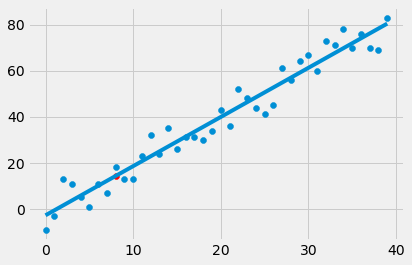

In [33]:
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, color='r')
plt.plot(xs, regression_line)
plt.show()